# Анализ поведения пользователей компании по доставке продуктов на дом с AppMetrica в конце I квартала 2020 года. Оценка эффективности каналов привлечения.

In [1]:
# Загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Данные
kc_case_data = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/r_rwR5B_1HniHg')

In [3]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


# Описание данных.
date – дата совершения события

- event - событие
    
    app_install – установка приложения
    
    app_start – открыть приложения
    
    registration – зарегистрироваться 
    
    search – перейти на страницу поиска товаров (каталог)
   
    open_item – открыть товар
    
    choose_item – отправить товар в корзину
    
    tap_basket – перейти в корзину
    
    purchase – подтверждение покупки
- gender – пол пользователя
- os_name – платформа пользователя
- city – город пользователя
- device_id – идентификатор устройства пользователя
- urm_source – канал, с которого пришел пользователь
    
    yandex-direct – Яндекс директ
    
    google_ads – реклама в Google
    
    vk_ads – реклама в ВК
   
    instagram_ads – реклама в instagram
    
    facebook_ads – реклама в facebook
    
    referral – акция «приведи друга»
    
    ‘-’ - канал не определен или это скачивание приложения напрямую или посещение не с рекламы  
- purchase_sum – стоимость покупки (при совершении события ‘purchase’)

Особенности данных:
- В выгрузке только уникальные действия пользователей за каждый день 

- Можно миновать стадию установки приложения, если оно было установлено ранее

- Можно миновать стадию регистрации, если пользователь был уже залогинен на момент сессии. Однако незарегистрированные пользователи не могут оформить покупку. 

In [4]:
# Типы данных
kc_case_data.dtypes

date             object
event            object
purchase_sum    float64
os_name          object
device_id         int64
gender           object
city             object
utm_source       object
dtype: object

In [5]:
# Изменение типа поля на дату
kc_case_data['date'] = pd.to_datetime(kc_case_data['date'])

In [6]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads


# Количество уникальных пользователей в приложении за месяц без повторов MAU

In [7]:
# Добавление поля с месяцем
kc_case_data['month'] = kc_case_data['date'].dt.to_period('M')

In [8]:
# Копия датасета
kc_case_MAU = kc_case_data.copy()

In [9]:
# Фильтр только на открытие приложения
kc_case_MAU = kc_case_data.query('event == "app_start"')

In [10]:
kc_case_MAU

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01
...,...,...,...,...,...,...,...,...,...
2502775,2020-03-31,app_start,NaN,ios,25710870,female,Saint-Petersburg,vk_ads,2020-03
2502776,2020-03-31,app_start,NaN,ios,26368771,male,Moscow,-,2020-03
2502777,2020-03-31,app_start,NaN,android,29262521,male,Moscow,yandex-direct,2020-03
2502778,2020-03-31,app_start,NaN,android,30951098,male,Moscow,instagram_ads,2020-03


In [11]:
kc_case_MAU = kc_case_MAU.groupby('month', as_index=False) \
    .agg({'device_id': 'nunique'}) \
    .rename(columns={'device_id': 'MAU'})

kc_case_MAU

,month,MAU
0,2020-01,99161
1,2020-02,75032
2,2020-03,74623


Text(0, 0.5, 'MAU')

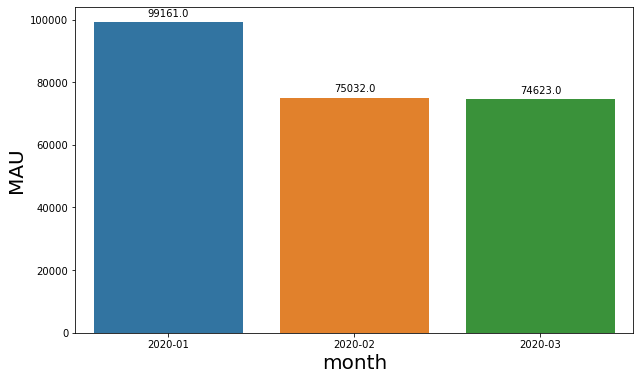

In [12]:
plt.figure(figsize=(10, 6))
graf=sns.barplot(x='month', y='MAU', data=kc_case_MAU)
for p in graf.patches:
    graf.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("month", size=20)
plt.ylabel("MAU", size=20)

# Количество установок

In [13]:
kc_case_app_install = kc_case_data.query('event == "app_install"') \
    .groupby('month', as_index=False) \
    .agg({'device_id': 'nunique'}) \
    .rename(columns={'device_id': 'installs'})

kc_case_app_install

,month,installs
0,2020-01,80297
1,2020-02,38078
2,2020-03,36222


Text(0, 0.5, 'installs')

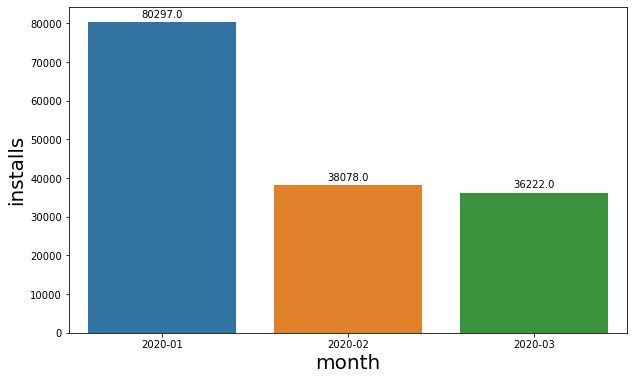

In [14]:
plt.figure(figsize=(10, 6))
graf=sns.barplot(x='month', y='installs', data=kc_case_app_install)
for p in graf.patches:
    graf.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.xlabel("month", size=20)
plt.ylabel("installs", size=20)

В феврале установки упали более чем вдвое, в марте также наблюдается снижении, но не такое критичное.

# Платные маркетинговые каналы с наибольшим притоком новых пользователей.

In [15]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [16]:
kc_case_utm_source = kc_case_data.query('utm_source != "-"') \
    .groupby('utm_source', as_index=False) \
    .agg({'device_id': 'nunique'}) \
    .sort_values('device_id', ascending=False)

kc_case_utm_source

,utm_source,device_id
5,yandex-direct,40712
1,google_ads,38096
4,vk_ads,34086
2,instagram_ads,31048
0,facebook_ads,25959
3,referal,15926


Больше всего новых пользователей приносит Яндекс. Чуть меньше Гугл и ВК.

# Конверсия из установки в покупку в течение 7 дней. 
Пользователь считается сконвертировавшимся, если с момента установки до совершения первой покупки прошло не более 7 дней.

In [17]:
# все установки
install_date = kc_case_data.query('event == "app_install"')

In [18]:
# оставляю нужные колонки
install_date = install_date[['date','device_id']]

In [19]:
# Присваиваю когорты по дню установки
install_date = install_date.rename(columns={'date':'cohorts_install'})
install_date.head()

,cohorts_install,device_id
2515061,2020-01-01,4921563
2515062,2020-01-01,1311583
2515063,2020-01-01,23006325
2515064,2020-01-01,5645652
2515065,2020-01-01,8798567


In [20]:
# каждому пользователю присваиваю кагорту
kc_case_coh = kc_case_data.copy()
kc_case_coh = kc_case_coh.merge(install_date, how = 'left', on = 'device_id')
kc_case_coh

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01,2020-01-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01,NaT
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03,2020-03-28
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03,2020-03-31
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03,2020-03-31
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03,2020-03-06


Проверю значения cohorts_install, если NaT

In [21]:
kc_case_coh[kc_case_coh.cohorts_install.isnull()].query('event == "app_install"')

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install


Отсутствующие значения в поле cohorts_install говорят о том, что установка приложения состоялась раньше начала I квартала 2020 года.

Нахожу сконвертировавшихся пользователей

In [22]:
# сортрую по дате на увеличение
# отбираю все все покупки
# убираю дубликаты пользователей, чтобы получить только первые покупки
purchase_data = kc_case_coh.sort_values('date') \
    .query('event == "purchase"') \
    .drop_duplicates('device_id')

purchase_data

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install
7952,2020-01-01,purchase,340.0,ios,2493551,male,Moscow,instagram_ads,2020-01,2020-01-01
7953,2020-01-01,purchase,126.5,ios,21126331,female,Moscow,facebook_ads,2020-01,2020-01-01
7954,2020-01-01,purchase,312.0,android,30122456,male,Moscow,instagram_ads,2020-01,2020-01-01
7955,2020-01-01,purchase,376.0,ios,646676,male,Moscow,instagram_ads,2020-01,NaT
7956,2020-01-01,purchase,530.5,android,11320945,male,Moscow,google_ads,2020-01,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
2506579,2020-03-31,purchase,551.0,android,815864,male,Saint-Petersburg,yandex-direct,2020-03,2020-02-21
2506570,2020-03-31,purchase,612.5,ios,2399328,male,Moscow,-,2020-03,2020-03-31
2506566,2020-03-31,purchase,560.0,android,378786,male,Saint-Petersburg,facebook_ads,2020-03,2020-03-31
2506565,2020-03-31,purchase,280.0,android,33462136,female,Moscow,-,2020-03,2020-03-31


In [23]:
# новая колонка с разницей между установкой и первой покупкой
purchase_data['converted'] = purchase_data.date - purchase_data.cohorts_install
purchase_data

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install,converted
7952,2020-01-01,purchase,340.0,ios,2493551,male,Moscow,instagram_ads,2020-01,2020-01-01,0 days
7953,2020-01-01,purchase,126.5,ios,21126331,female,Moscow,facebook_ads,2020-01,2020-01-01,0 days
7954,2020-01-01,purchase,312.0,android,30122456,male,Moscow,instagram_ads,2020-01,2020-01-01,0 days
7955,2020-01-01,purchase,376.0,ios,646676,male,Moscow,instagram_ads,2020-01,NaT,NaT
7956,2020-01-01,purchase,530.5,android,11320945,male,Moscow,google_ads,2020-01,2020-01-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...
2506579,2020-03-31,purchase,551.0,android,815864,male,Saint-Petersburg,yandex-direct,2020-03,2020-02-21,39 days
2506570,2020-03-31,purchase,612.5,ios,2399328,male,Moscow,-,2020-03,2020-03-31,0 days
2506566,2020-03-31,purchase,560.0,android,378786,male,Saint-Petersburg,facebook_ads,2020-03,2020-03-31,0 days
2506565,2020-03-31,purchase,280.0,android,33462136,female,Moscow,-,2020-03,2020-03-31,0 days


In [24]:
# Проверяю тип данных
purchase_data.dtypes

date                datetime64[ns]
event                       object
purchase_sum               float64
os_name                     object
device_id                    int64
gender                      object
city                        object
utm_source                  object
month                    period[M]
cohorts_install     datetime64[ns]
converted          timedelta64[ns]
dtype: object

In [25]:
# Изменения типа данных нового поля на числовое
purchase_data.converted = purchase_data.converted.dt.days

In [26]:
# отбираю не более 7 дней, чтобы отобрать только сконвертировавшихся
purchase_data = purchase_data.query('converted < 8')

In [27]:
# беру нужные колонки
purchase_data = purchase_data[['device_id', 'converted']]

In [28]:
# присваиваю каждому сконвертировавшемуся пользователю кол-во дней до первой покупки
kc_case_coh = kc_case_coh.merge(purchase_data, how = 'left', on = 'device_id')

In [29]:
kc_case_coh.sort_values('converted', ascending=False)

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install,converted
220251,2020-01-10,tap_basket,NaN,ios,6974835,male,Moscow,facebook_ads,2020-01,2020-01-01,7.0
1629784,2020-02-25,choose_item,NaN,android,362804,male,Saint-Petersburg,-,2020-02,2020-01-08,7.0
740083,2020-01-25,choose_item,NaN,android,11899450,male,Moscow,referal,2020-01,2020-01-01,7.0
740117,2020-01-25,choose_item,NaN,android,12677384,male,Saint-Petersburg,vk_ads,2020-01,2020-01-19,7.0
1630026,2020-02-25,choose_item,NaN,ios,186579,male,Saint-Petersburg,google_ads,2020-02,2020-01-04,7.0
...,...,...,...,...,...,...,...,...,...,...,...
2747954,2020-03-31,register,NaN,ios,29802553,male,Saint-Petersburg,instagram_ads,2020-03,2020-02-22,NaN
2747956,2020-03-31,register,NaN,android,31468146,male,Moscow,vk_ads,2020-03,NaT,NaN
2747957,2020-03-31,register,NaN,ios,7147298,male,Moscow,google_ads,2020-03,2020-03-07,NaN
2747961,2020-03-31,register,NaN,android,4294936,female,Saint-Petersburg,yandex-direct,2020-03,NaT,NaN


Нахожу кол-во установок по кагортам

In [30]:
# отбираю все установки
install = kc_case_coh.query('event == "app_install"')
install

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,cohorts_install,converted
2515061,2020-01-01,app_install,NaN,ios,4921563,male,Moscow,vk_ads,2020-01,2020-01-01,NaN
2515062,2020-01-01,app_install,NaN,ios,1311583,male,Moscow,-,2020-01,2020-01-01,NaN
2515063,2020-01-01,app_install,NaN,android,23006325,male,Saint-Petersburg,-,2020-01,2020-01-01,0.0
2515064,2020-01-01,app_install,NaN,android,5645652,male,Moscow,-,2020-01,2020-01-01,NaN
2515065,2020-01-01,app_install,NaN,ios,8798567,male,Saint-Petersburg,referal,2020-01,2020-01-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2669653,2020-03-31,app_install,NaN,ios,19717968,female,Moscow,-,2020-03,2020-03-31,NaN
2669654,2020-03-31,app_install,NaN,android,32966665,female,Saint-Petersburg,-,2020-03,2020-03-31,NaN
2669655,2020-03-31,app_install,NaN,ios,6335964,female,Moscow,referal,2020-03,2020-03-31,NaN
2669656,2020-03-31,app_install,NaN,android,29155826,male,Saint-Petersburg,vk_ads,2020-03,2020-03-31,NaN


In [31]:
# группирую по кагортам и считаю их кол-во
install = install.groupby('cohorts_install', as_index=False) \
    .agg({'device_id':'count'}) \
    .sort_values('device_id', ascending=False) \
    .rename(columns={'device_id': 'cnt_inst'})

In [32]:
install

,cohorts_install,cnt_inst
9,2020-01-10,13106
65,2020-03-06,6358
13,2020-01-14,5173
12,2020-01-13,4571
10,2020-01-11,4523
...,...,...
63,2020-03-04,452
73,2020-03-14,443
76,2020-03-17,431
64,2020-03-05,411


Нахожу кол-во сконвертировавшихся пользователей по кагортам

In [33]:
# сортрую по дате на увеличение
# отбираювсе все покупки
# убираю дубликаты пользователей, чтобы получить только первые покупки
# удаляю несконвртировавшихся пользователей
purchase_conv = kc_case_coh.sort_values('date') \
    .query('event == "purchase"') \
    .drop_duplicates('device_id') \
    .dropna(subset=['converted'])

In [34]:
# группирую по кагортам и считаю их кол-во
purchase_conv = purchase_conv.groupby('cohorts_install', as_index=False) \
    .agg({'device_id':'count'}) \
    .rename(columns={'device_id': 'cnt_conv'})

purchase_conv

,cohorts_install,cnt_conv
0,2020-01-01,1408
1,2020-01-02,1186
2,2020-01-03,834
3,2020-01-04,639
4,2020-01-05,587
...,...,...
86,2020-03-27,277
87,2020-03-28,209
88,2020-03-29,223
89,2020-03-30,204


Нахожу CR

In [35]:
# соеденяю в новую таблицу по кагортам
CR = install.merge(purchase_conv, how = 'left', on = 'cohorts_install')

In [36]:
# считаю CR в поцентах
CR['cr'] = round((CR.cnt_conv / CR.cnt_inst)*100,1)

In [37]:
CR.sort_values('cr', ascending=False).query('cr >= 35')

,cohorts_install,cnt_inst,cnt_conv,cr
7,2020-01-01,3579,1408,39.3
35,2020-01-09,1424,558,39.2
5,2020-01-15,4310,1650,38.3
2,2020-01-14,5173,1973,38.1
9,2020-01-02,3144,1186,37.7
3,2020-01-13,4571,1715,37.5
17,2020-01-19,2257,837,37.1
19,2020-01-20,2097,775,37.0
8,2020-01-16,3306,1215,36.8
11,2020-01-17,2737,989,36.1


Наибольшая конверсия (более 35%) приходится на январь.

# Платные маркетинговые каналы, пользователи, пришедшие с которых показали самую низкую конверсию в покупку. 

In [38]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [39]:
# кол-во юзеров, впервые совершивших покупку

first_purchase = kc_case_data.query('event == "purchase"') \
    .groupby('utm_source', as_index=False) \
    .agg({'device_id': 'nunique'}) \
    .rename(columns={'device_id': 'purchase_count'})

first_purchase

,utm_source,purchase_count
0,-,16598
1,facebook_ads,9017
2,google_ads,11339
3,instagram_ads,10762
4,referal,6362
5,vk_ads,12364
6,yandex-direct,12028


In [40]:
# кол-во юзеров, впервые открывших приложение
first_app_start = kc_case_data.query('event == "app_start"') \
    .groupby('utm_source', as_index=False) \
    .agg({'device_id': 'nunique'}) \
    .rename(columns={'device_id': 'app_start_count'})

first_app_start

,utm_source,app_start_count
0,-,52268
1,facebook_ads,25957
2,google_ads,38092
3,instagram_ads,31045
4,referal,15924
5,vk_ads,34079
6,yandex-direct,40707


In [41]:
min_cr = first_app_start.merge(first_purchase, on='utm_source')
min_cr

,utm_source,app_start_count,purchase_count
0,-,52268,16598
1,facebook_ads,25957,9017
2,google_ads,38092,11339
3,instagram_ads,31045,10762
4,referal,15924,6362
5,vk_ads,34079,12364
6,yandex-direct,40707,12028


In [42]:
min_cr['CR'] = round(min_cr.purchase_count / min_cr.app_start_count * 100, 2)
min_cr.sort_values('CR')

,utm_source,app_start_count,purchase_count,CR
6,yandex-direct,40707,12028,29.55
2,google_ads,38092,11339,29.77
0,-,52268,16598,31.76
3,instagram_ads,31045,10762,34.67
1,facebook_ads,25957,9017,34.74
5,vk_ads,34079,12364,36.28
4,referal,15924,6362,39.95


Пользователи, показывающие самую низкую конверсию, пришли с Яндекса и Гугл. Выше рассчитано, что Яндекс и Гугл приносит больше всего новых пользователей, но нам нужна прибыль. Качество пользователей важнее количества. Либо платные маркетинговые сервисы привлекают не подходящую для нас целевую аудиторию, либо нужно прокачать приложение, чтобы пришедшие пользователи совершали покупки.

# Медианный чек первых покупок пользователей.

In [43]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [44]:
# Отбор совершенных покупок, сортировка по дате совершения покупки и id
kc_case_median = kc_case_data.query('event == "purchase"').sort_values(['date', 'device_id'])
kc_case_median

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
7914,2020-01-01,purchase,628.5,ios,4378,male,Saint-Petersburg,google_ads,2020-01
8303,2020-01-01,purchase,72.0,android,4505,female,Moscow,yandex-direct,2020-01
8432,2020-01-01,purchase,351.0,ios,6486,female,Saint-Petersburg,vk_ads,2020-01
8547,2020-01-01,purchase,2674.5,ios,8674,female,Saint-Petersburg,-,2020-01
8080,2020-01-01,purchase,78.0,android,9968,female,Saint-Petersburg,facebook_ads,2020-01
...,...,...,...,...,...,...,...,...,...
2507067,2020-03-31,purchase,141.0,android,34964615,female,Saint-Petersburg,instagram_ads,2020-03
2506627,2020-03-31,purchase,613.0,ios,35057676,male,Moscow,instagram_ads,2020-03
2506590,2020-03-31,purchase,257.5,android,35171283,female,Moscow,vk_ads,2020-03
2507015,2020-03-31,purchase,351.5,android,35315632,female,Moscow,-,2020-03


In [45]:
# Только первые покупки пользователей
kc_case_median = kc_case_median.drop_duplicates(subset=['device_id'])
kc_case_median

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
7914,2020-01-01,purchase,628.5,ios,4378,male,Saint-Petersburg,google_ads,2020-01
8303,2020-01-01,purchase,72.0,android,4505,female,Moscow,yandex-direct,2020-01
8432,2020-01-01,purchase,351.0,ios,6486,female,Saint-Petersburg,vk_ads,2020-01
8547,2020-01-01,purchase,2674.5,ios,8674,female,Saint-Petersburg,-,2020-01
8080,2020-01-01,purchase,78.0,android,9968,female,Saint-Petersburg,facebook_ads,2020-01
...,...,...,...,...,...,...,...,...,...
2507067,2020-03-31,purchase,141.0,android,34964615,female,Saint-Petersburg,instagram_ads,2020-03
2506627,2020-03-31,purchase,613.0,ios,35057676,male,Moscow,instagram_ads,2020-03
2506590,2020-03-31,purchase,257.5,android,35171283,female,Moscow,vk_ads,2020-03
2507015,2020-03-31,purchase,351.5,android,35315632,female,Moscow,-,2020-03


In [46]:
# Медианный чек первых покупок пользователей
kc_case_median = kc_case_median.groupby('utm_source', as_index=False) \
    .agg({'purchase_sum': 'median'}) \
    .rename(columns={'purchase_sum': 'median_payment'}) \
    .sort_values('median_payment', ascending=False)

In [47]:
kc_case_median

,utm_source,median_payment
0,-,398.5
4,referal,395.5
3,instagram_ads,393.5
5,vk_ads,393.0
6,yandex-direct,392.5
2,google_ads,390.5
1,facebook_ads,389.0


Медианный чек пользователей, совершивших первую покупку, распределен достаточно ровно со всех каналов привлечения.

Что имеется:
    Яндекс, Гугл и ВК приносят больше всего новых пользователей
    
    Максимальный приток приходится на январь. В следующем месяце - падение в 2 раза. Очевидно, что январь - актуальный месяц для доставки продуктов, четверть месяца приходится на праздничные дни. В январе половина месяца - выходные дни. Пользователи отдыхают, пользуются интернетом, видят рекламу нашего приложения, скачивают и регистрируются.
    
    Медианный чек первой покупки почти не отличается от канала к каналу. 
    
    При том, что Яндекс приносит больше всего новых пользователей - конверсию в покупку имеет самую низкую. Это может говорить о привлечении не той целевой аудитории, которая нам нужна. 

# Вся меющаяся на данный момент аналитика так же может говорить о низком удержании клиентов. Нужно выяснить, на каком этапе воронки отваливается больше всего пользователей.

In [48]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


Добавить признак регистрации. Сделаю это по дате регистрации.

In [49]:
# зарегистрированные
register_users = kc_case_data.query('event == "register"')

In [50]:
register_users = register_users[['date', 'device_id']].rename(columns={'date': 'date_register'})

In [51]:
register_users.head()

,date_register,device_id
2669658,2020-01-01,294193
2669659,2020-01-01,22917617
2669660,2020-01-01,15248490
2669661,2020-01-01,252062
2669662,2020-01-01,2251583


In [52]:
# каждому пользователю присваиваю дату регистрации
kc_case_reg = kc_case_data.merge(register_users, how='left', on='device_id')

In [53]:
kc_case_reg

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,date_register
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01,2020-01-07
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01,2020-01-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01,2020-01-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01,2020-01-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01,NaT
...,...,...,...,...,...,...,...,...,...,...
2747963,2020-03-31,register,NaN,android,2984778,male,Saint-Petersburg,facebook_ads,2020-03,2020-03-31
2747964,2020-03-31,register,NaN,ios,27301864,male,Moscow,-,2020-03,2020-03-31
2747965,2020-03-31,register,NaN,ios,1294285,female,Saint-Petersburg,google_ads,2020-03,2020-03-31
2747966,2020-03-31,register,NaN,android,3010574,female,Saint-Petersburg,google_ads,2020-03,2020-03-31


Если дата регистрации < даты совершения события, то пользователь уже зарегистрирован. 

In [54]:
# Добавление признака регистрации
kc_case_reg['register'] = kc_case_reg.date_register < kc_case_reg.date

In [55]:
kc_case_reg.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,date_register,register
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01,2020-01-07,False
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01,2020-01-01,False
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01,2020-01-01,False
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01,2020-01-01,False
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01,NaT,False


In [56]:
# зарегестрирован
df_register = kc_case_reg.query('register == True')
df_register

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month,date_register,register
15148,2020-01-02,app_start,NaN,ios,3163406,female,Moscow,instagram_ads,2020-01,2020-01-01,True
15175,2020-01-02,app_start,NaN,ios,2169108,female,Moscow,google_ads,2020-01,2020-01-01,True
15197,2020-01-02,app_start,NaN,android,4863305,male,Saint-Petersburg,vk_ads,2020-01,2020-01-01,True
15210,2020-01-02,app_start,NaN,android,15248490,male,Moscow,facebook_ads,2020-01,2020-01-01,True
15214,2020-01-02,app_start,NaN,ios,25617659,male,Moscow,vk_ads,2020-01,2020-01-01,True
...,...,...,...,...,...,...,...,...,...,...,...
2515051,2020-03-31,tap_basket,NaN,ios,2421944,female,Moscow,google_ads,2020-03,2020-02-27,True
2515053,2020-03-31,tap_basket,NaN,ios,9985819,female,Moscow,google_ads,2020-03,2020-03-24,True
2515054,2020-03-31,tap_basket,NaN,android,3043852,male,Moscow,-,2020-03,2020-03-30,True
2515056,2020-03-31,tap_basket,NaN,android,3162094,male,Moscow,referal,2020-03,2020-01-13,True


In [57]:
# группирую по событию, считаю их кол-во
cr_register = df_register.groupby('event',as_index=False) \
    .agg({'device_id': 'count'}) \
    .rename(columns={'device_id': 'cnt_events'}) \
    .sort_values('cnt_events', ascending=False)
cr_register

,event,cnt_events
0,app_start,441486
3,search,417101
1,choose_item,314473
4,tap_basket,217256
2,purchase,73630


Text(0, 0.5, 'count')

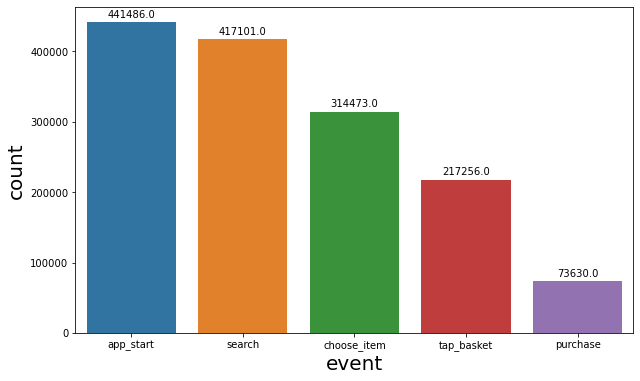

In [58]:
plt.figure(figsize=(10, 6))
graf=sns.barplot(x='event', y='cnt_events', data=cr_register)
for p in graf.patches:
    graf.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.xlabel("event", size=20)
plt.ylabel("count", size=20)

In [59]:
cr_register = cr_register.pivot(columns='event', values='cnt_events') \
      .apply(lambda x: pd.Series(x.dropna() \
      .values.astype("int"))).rename_axis(None, axis=1)
cr_register

,app_start,choose_item,purchase,search,tap_basket
0,441486,314473,73630,417101,217256


CR в каждое событие

In [60]:
# от открытия приложения к поиску товаров
cr_register['cr_search'] = round((cr_register.search / cr_register.app_start)*100,2)

In [61]:
# от поиска товаров к добавления товара в корзину
cr_register['cr_choose_item'] = round((cr_register.choose_item / cr_register.search)*100,2)

In [62]:
# от добавления товара в корзину к переходу в корзину
cr_register['cr_tap_basket'] = round((cr_register.tap_basket / cr_register.choose_item)*100,2)

In [63]:
# от перехода в корзину к подтверждению покупки
cr_register['cr_purchase'] = round((cr_register.purchase / cr_register.tap_basket)*100,2)

In [64]:
cr_register = cr_register[['cr_search', 'cr_choose_item', 'cr_tap_basket', 'cr_purchase']]

In [65]:
cr_register

,cr_search,cr_choose_item,cr_tap_basket,cr_purchase
0,94.48,75.39,69.09,33.89


In [66]:
# Зарегистрирован ранее (не требует регистрации)
df_not_register = kc_case_reg.query('register == False')

In [67]:
# группирую по событию, считаю их кол-во
df_not_register = df_not_register.groupby('event',as_index=False).agg({'device_id': 'count'}).sort_values('device_id', ascending=False)

In [68]:
df_not_register

,event,device_id
1,app_start,307219
5,search,291538
2,choose_item,224196
6,tap_basket,160409
0,app_install,154597
4,register,78310
3,purchase,67753


In [69]:
df_not_register = df_not_register.pivot(columns = "event", values="device_id")\
      .apply(lambda x: pd.Series(x.dropna()\
      .values.astype("int"))).rename_axis(None, axis=1)
df_not_register

,app_install,app_start,choose_item,purchase,register,search,tap_basket
0,154597,307219,224196,67753,78310,291538,160409


In [70]:
# CR в каждое событие

In [71]:
# от открытия приложения к поиску товаров
df_not_register['cr_search'] = round((df_not_register.search / df_not_register.app_start)*100,2)

In [72]:
# от поиска товаров к добавления товара в корзину
df_not_register['cr_choose_item'] = round((df_not_register.choose_item / df_not_register.search)*100,2)

In [73]:
# от добавления товара в корзину к переходу в корзину
df_not_register['cr_tap_basket'] = round((df_not_register.tap_basket / df_not_register.choose_item)*100,2)

In [74]:
# от перехода в корзину к подтверждению покупки
df_not_register['cr_purchase'] = round((df_not_register.purchase / df_not_register.tap_basket)*100,2)

In [75]:
df_not_register = df_not_register[['cr_search', 'cr_choose_item', 'cr_tap_basket', 'cr_purchase']]

In [76]:
# Конверсия зарегистрированных недавно (впределах исследуемых данных)
cr_register

,cr_search,cr_choose_item,cr_tap_basket,cr_purchase
0,94.48,75.39,69.09,33.89


По результатам нахождения относительных конверсий в каждое событие для пользователей, зарегистрированных недавно, можно сказать:
    почти 95% открывающих приложение ищут товары.
    
    более 75% из них добавляют товары в корзину. Высокий процент этого CR говорит о том, что пользователя устраивает ассортимент, цены, интерфейс, удобство использования приложения.
    
    почти 70% из них переходит в корзину. Опять же - высокий процент говорит о готовности покупателя оплатить покупку, указывает на удовлетворенность клиента при использовании нашего сервиса.
    
    и на последнем этапе - подтверждение покупки происходит менее чем 34% случаев. То есть 2/3 пользователей отваливается именно тут. Возможные причины:
    
    неудобный/непонятный интерфейс оплаты
    
    недостаточно вариантов способов оплаты
    
    нужно снова вводить адрес доставки/контакты/номер карты и прочее, т.е. данные с прошлых заказов не сохраняются.

In [77]:
# Конверсия зарегистрированных ранее (до 01.01.2020)
df_not_register

,cr_search,cr_choose_item,cr_tap_basket,cr_purchase
0,94.9,76.9,71.55,42.24


# Компания вкладывает в рекламу:

Гугл – 10 534 878 руб.

Яндекс – 10 491 707 руб.

ВК – 9 553 531 руб.

Фейсбук – 8 590 498 руб.

Инстаграм – 8 561 626 руб.

Расходы на реферальную программу: если пользователь приведет друга и последний совершит первую покупку, то оба получат по 100 рублей.

# Окупаемость маркетинговых вложений (ROMI)

ROMI=Валовая прибыль − Маркетинговые расходы

In [78]:
kc_case_data.head()

,date,event,purchase_sum,os_name,device_id,gender,city,utm_source,month
0,2020-01-01,app_start,NaN,android,669460,female,Moscow,-,2020-01
1,2020-01-01,app_start,NaN,ios,833621,male,Moscow,vk_ads,2020-01
2,2020-01-01,app_start,NaN,android,1579237,male,Saint-Petersburg,referal,2020-01
3,2020-01-01,app_start,NaN,android,1737182,female,Moscow,facebook_ads,2020-01
4,2020-01-01,app_start,NaN,ios,4029024,female,Moscow,facebook_ads,2020-01


In [79]:
# валовая прибыль
gross_profit = kc_case_data.query('event == "purchase"') \
    .groupby('utm_source', as_index=False) \
    .agg({'purchase_sum': 'sum'})

gross_profit

,utm_source,purchase_sum
0,-,21449749.5
1,facebook_ads,12249901.0
2,google_ads,12868276.0
3,instagram_ads,14546969.0
4,referal,8837044.5
5,vk_ads,16389652.5
6,yandex-direct,13915368.0


In [80]:
# расходы по каналам
channels_expenses = {'google_ads':'10534878', 'yandex-direct':'10491707', 'vk_ads':'9553531', 'facebook_ads':'8590498', 'instagram_ads':'8561626'}
channels_expenses

{'google_ads': '10534878',
 'yandex-direct': '10491707',
 'vk_ads': '9553531',
 'facebook_ads': '8590498',
 'instagram_ads': '8561626'}

In [81]:
# добавляю поле с расходами на маркетинг
gross_profit['channels_expenses'] = gross_profit['utm_source'].map(channels_expenses)
gross_profit

,utm_source,purchase_sum,channels_expenses
0,-,21449749.5,NaN
1,facebook_ads,12249901.0,8590498
2,google_ads,12868276.0,10534878
3,instagram_ads,14546969.0,8561626
4,referal,8837044.5,NaN
5,vk_ads,16389652.5,9553531
6,yandex-direct,13915368.0,10491707


In [82]:
# изменяю тип данных на float
gross_profit.channels_expenses = gross_profit.channels_expenses.apply(pd.to_numeric)

In [83]:
gross_profit.dtypes

utm_source            object
purchase_sum         float64
channels_expenses    float64
dtype: object

In [84]:
gross_profit

,utm_source,purchase_sum,channels_expenses
0,-,21449749.5,NaN
1,facebook_ads,12249901.0,8590498.0
2,google_ads,12868276.0,10534878.0
3,instagram_ads,14546969.0,8561626.0
4,referal,8837044.5,NaN
5,vk_ads,16389652.5,9553531.0
6,yandex-direct,13915368.0,10491707.0


In [85]:
# считаю ROMI
gross_profit['ROMI'] = (gross_profit.purchase_sum - gross_profit.channels_expenses) / gross_profit.channels_expenses

In [86]:
gross_profit.sort_values('ROMI', ascending=False)

,utm_source,purchase_sum,channels_expenses,ROMI
5,vk_ads,16389652.5,9553531.0,0.715560
3,instagram_ads,14546969.0,8561626.0,0.699090
1,facebook_ads,12249901.0,8590498.0,0.425983
6,yandex-direct,13915368.0,10491707.0,0.326321
2,google_ads,12868276.0,10534878.0,0.221493
0,-,21449749.5,NaN,NaN
4,referal,8837044.5,NaN,NaN


# Самыми окупаемыми каналами маркетинговых инвестиций являются каналы популярных в России социальных сетей - ВК и инстаграм.